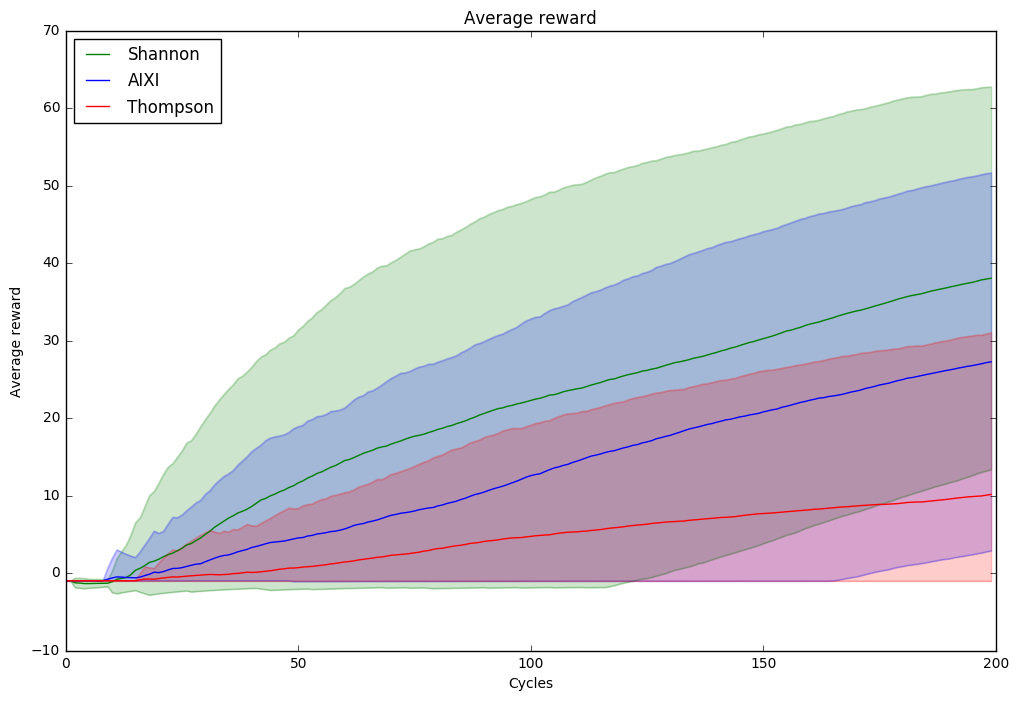

In [132]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import json

fig = plt.figure(figsize=(12,8),dpi=200)
files = ['Shannon','AIXI','Thompson']
colors = ['green','blue','red']
for i in xrange(len(files)):
    f = files[i]
    color = colors[i]
    alpha = 0.2
    file = open(f.lower() + '.json')
    data = json.load(file)
    A = np.zeros((data[0]['cycles'],len(data)))
    for j in xrange(len(data)):
        d = data[j]
        A[:,j] = np.array(d['rewards'])

    mu = np.mean(A,1)
    sigma = np.std(A,1)
    a = np.max(np.vstack((mu-sigma,np.min(A,1))),0)
    b = sigma+mu
    plt.plot(a,color=color,alpha=alpha)
    plt.plot(b,color=color,alpha=alpha)
    plt.plot(mu,color=color,label=f)
    plt.fill_between(np.arange(200),a,b,alpha=alpha,color=color)

plt.title('Average reward')
plt.xlabel('Cycles')
plt.ylabel('Average reward')
plt.legend(loc='upper left')
plt.show()